In [73]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 가중치 시각화

In [74]:
from tensorflow import keras

In [75]:
model = keras.models.load_model('best-cnn-model.h5')

In [76]:
model.layers

In [77]:
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)
# 첫 번째 레이어인 conv 필터의 크기와 절편(bias) 갯수

(3, 3, 1, 32) (32,)


In [78]:
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.016005877 0.23252846


In [79]:
import matplotlib.pyplot as plt

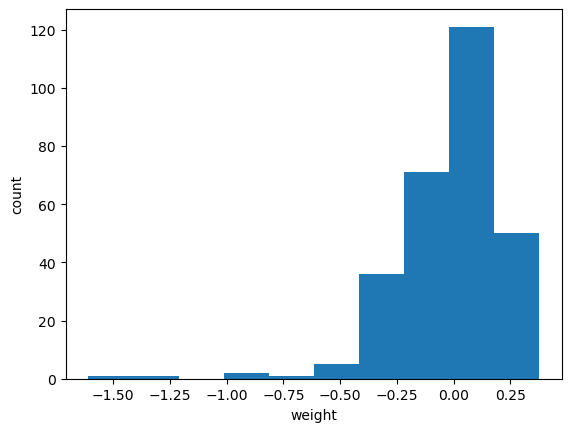

In [80]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

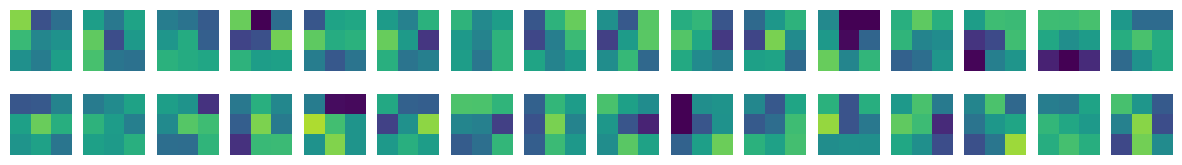

In [81]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

훈련시키지 않은 신경망의 가중치 확인해보기

In [82]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

In [83]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [84]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

-0.010310263 0.0773888


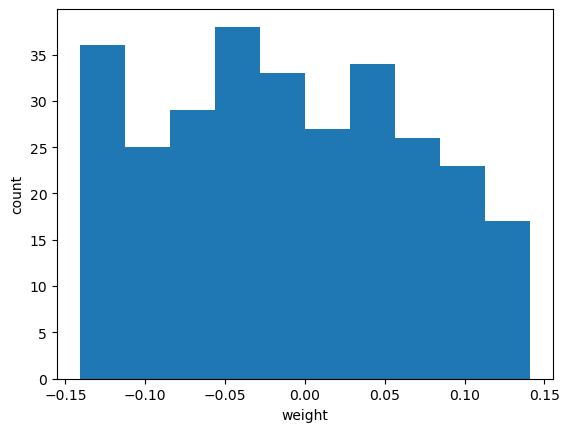

In [85]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

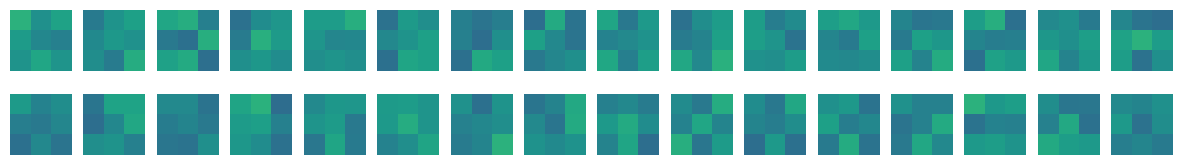

In [86]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

## 함수형 API

keras.Model을 사용하여 앞서 만든 model의 input으로 받아 ouput을 뱉는 conv_acti모델을 생성.

In [87]:
# dense1 = keras.layers.Dense(100, activation='sigmoid')
# dense2 = keras.layers.Dense(10, activation='softmax')

# inputs = keras.Input(shape=(784,))

# hidden = dense1(inputs)

# outputs = dense2(hidden)

# model = keras.Model(inputs, outputs)

In [88]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [89]:
conv_acti = keras.Model(model.input, model.layers[0].output)

## 특성 맵 시각화

In [90]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

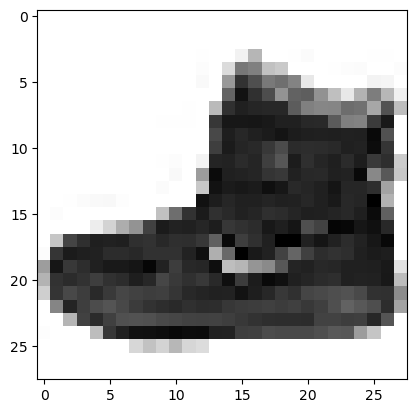

In [91]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [92]:
input = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(input)

1/1 [==============================] - 0s 113ms/step


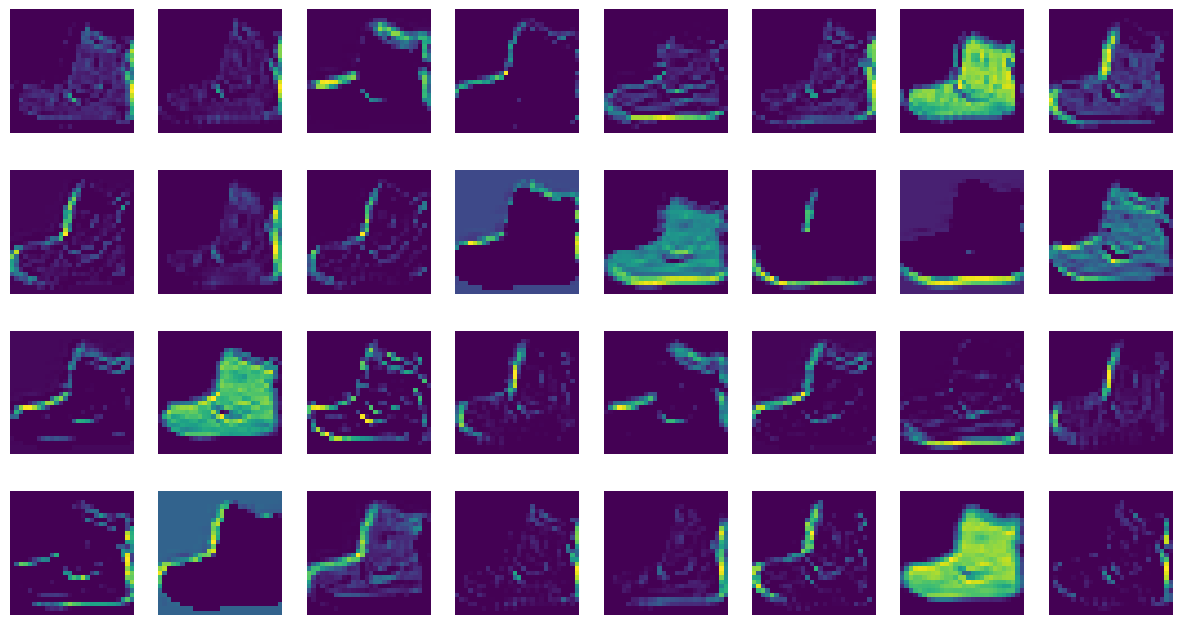

In [94]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

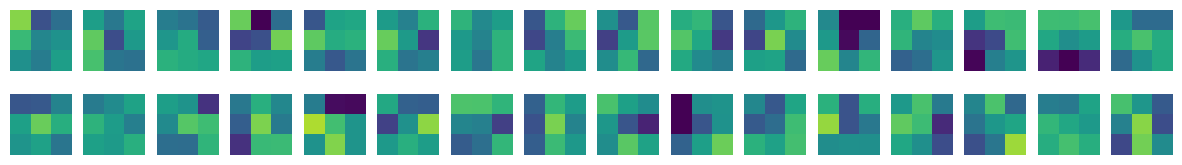

In [95]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [96]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

1/1 [==============================] - 0s 74ms/step


In [97]:
print(feature_maps.shape)

(1, 14, 14, 64)


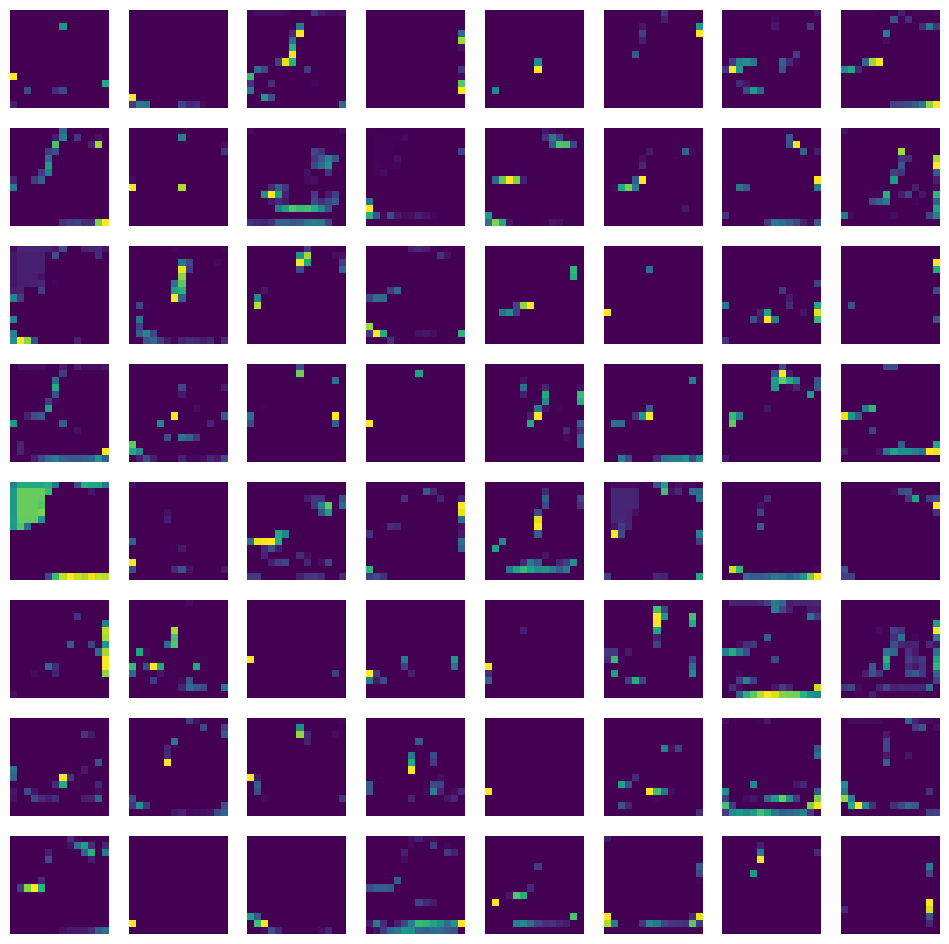

In [98]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

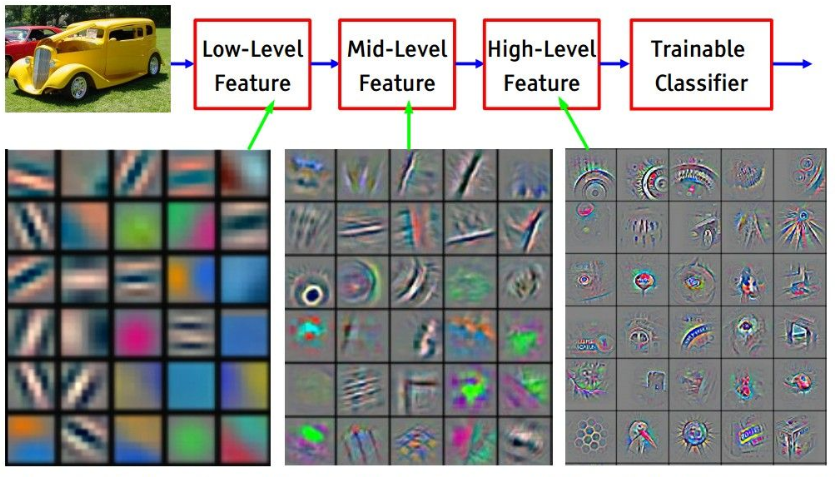

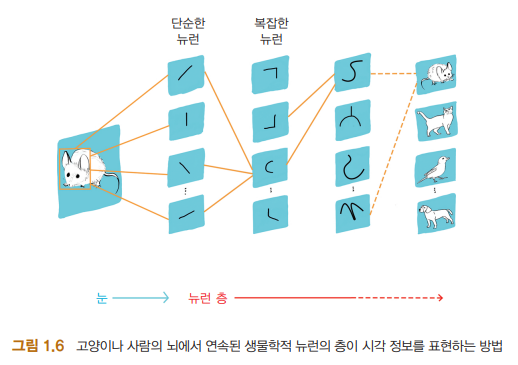

허블과 비셀의 일차 시각피질 연구